Ngưỡng Otsu: 0.5960400390625


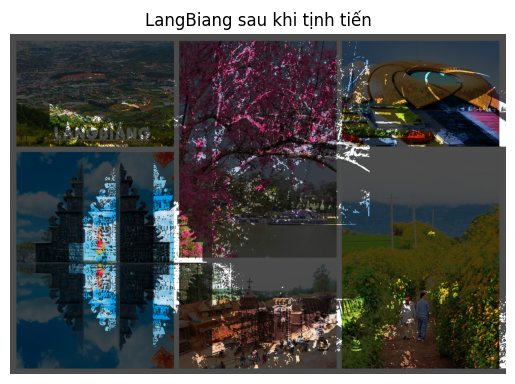

In [2]:
# 1. Viết chương trình chọn LangBiang trong ảnh Đà Lạt từ thư mục exercise. Tịnh tiến vùng
# chọn sang phải 100px. Sử dụng phương pháp Otsu để phân vùng LangBiang theo ngưỡng 0.3.
# Lưu vào máy với tên lang_biang.jpg và hiển thị trên màn hình.

from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_otsu
from skimage.color import rgb2gray

# Đọc ảnh từ thư mục exercise
img = iio.imread('dalat.jpg')  # đổi tên ảnh nếu cần
gray = rgb2gray(img)

# Phân ngưỡng bằng phương pháp Otsu hoặc thủ công ngưỡng 0.3
# Ngưỡng Otsu từ ảnh
otsu_thresh = threshold_otsu(gray)
print("Ngưỡng Otsu:", otsu_thresh)

# Ngưỡng 0.3 để chọn vùng LangBiang
binary = gray < 0.3  # vùng tối hơn ngưỡng 0.3 (LangBiang thường là vùng chữ đen hoặc tối)

# Tịnh tiến vùng chọn sang phải 100px
translated_mask = nd.shift(binary.astype(float), shift=[0, 100], order=0)

# Tạo ảnh đầu ra: giữ nguyên ảnh gốc, nhưng làm nổi bật vùng LangBiang đã tịnh tiến
output = img.copy()
# Làm mờ các vùng không thuộc LangBiang
output[translated_mask < 0.5] = (output[translated_mask < 0.5] * 0.3).astype(np.uint8)

# Lưu và hiển thị ảnh
iio.imwrite('lang_biang.jpg', output)

plt.imshow(output)
plt.title("LangBiang sau khi tịnh tiến")
plt.axis('off')
plt.show()


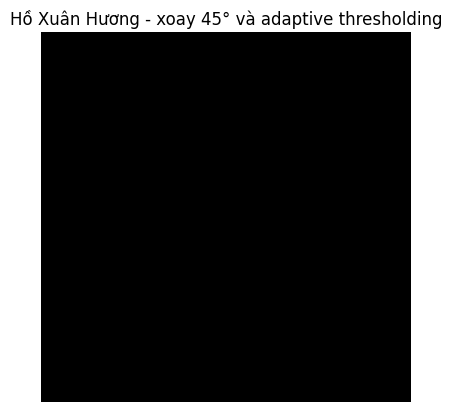

In [3]:
# 2. Viết chương trình chọn Hồ Xuân Hương trong ảnh Đà Lạt từ thư mục exercise. Xoay đối
# tượng vừa chọn 1 góc 45° và dùng phương pháp Adaptive Thresholding với ngưỡng 60 và lưu
# vào máy với tên là ho_xuan_huong.jpg.

from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_local
from skimage.color import rgb2gray

# Bước 1: Đọc ảnh
img = iio.imread('dalat.jpg')  # thay đổi tên nếu ảnh khác
gray = rgb2gray(img)

# Bước 2: Tạo mask chọn vùng Hồ Xuân Hương (giả định vùng chữ nhật - cần chọn tay hoặc biết toạ độ)
# Ở đây giả sử vùng (y1:y2, x1:x2) chứa Hồ Xuân Hương (thay số nếu biết rõ hơn)
y1, y2 = 300, 500
x1, x2 = 200, 500
region = gray[y1:y2, x1:x2]

# Bước 3: Xoay vùng chọn 45 độ
rotated = nd.rotate(region, angle=45, reshape=True)

# Bước 4: Áp dụng Adaptive Thresholding
block_size = 35  # Kích thước khối tính ngưỡng cục bộ
local_thresh = threshold_local(rotated, block_size, offset=10)
binary_adaptive = rotated > local_thresh

# Bước 5: Chuyển ảnh nhị phân sang kiểu uint8 để lưu
result = (binary_adaptive * 255).astype(np.uint8)

# Bước 6: Lưu ảnh và hiển thị
iio.imwrite('ho_xuan_huong.jpg', result)

plt.imshow(result, cmap='gray')
plt.title("Hồ Xuân Hương - xoay 45° và adaptive thresholding")
plt.axis('off')
plt.show()

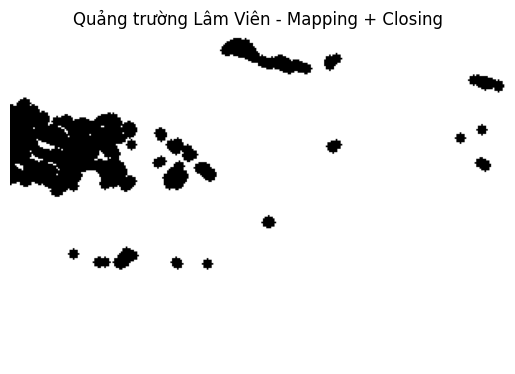

In [4]:
# 3. Viết chương trình chọn Quản trường Lâm Viên trong ảnh Đà Lạt từ thư mục exercise. Dùng
# phương pháp Coordinate Mapping và Binary Closing cho vùng vừa chọn. Lưu vào máy với tên
# là quan_truong_lam_vien.jpg.

import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import scipy.ndimage as nd
from skimage.color import rgb2gray
from skimage.morphology import binary_closing, disk

# Đọc ảnh từ thư mục exercise
img = iio.imread('dalat.jpg')
gray = rgb2gray(img)

# Cắt vùng Quảng trường Lâm Viên (giả định vùng hình chữ nhật)
# Bạn nên chỉnh các giá trị y1:y2, x1:x2 theo ảnh thật
y1, y2 = 200, 400
x1, x2 = 100, 400
region = gray[y1:y2, x1:x2]

# --- Coordinate Mapping: Gợn sóng theo trục x ---
rows, cols = region.shape
map_y, map_x = np.indices((rows, cols))
# Tạo hiệu ứng gợn sóng theo trục y
map_x = map_x + 10 * np.sin(2 * np.pi * map_y / 50)

# Dùng scipy để ánh xạ toạ độ
mapped = nd.map_coordinates(region, [map_y, map_x], order=1, mode='reflect')

# Phân ngưỡng nhị phân: chọn vùng sáng (giả định quảng trường)
binary = mapped > 0.4  # điều chỉnh ngưỡng nếu cần

# --- Áp dụng Binary Closing để làm đầy lỗ nhỏ ---
closed = binary_closing(binary, footprint=disk(3))  # disk(radius) tạo kernel hình tròn

# Chuyển sang uint8 để lưu
result = (closed * 255).astype(np.uint8)

# Lưu và hiển thị
iio.imwrite('quan_truong_lam_vien.jpg', result)

plt.imshow(result, cmap='gray')
plt.title("Quảng trường Lâm Viên - Mapping + Closing")
plt.axis('off')
plt.show()

=== MENU ===
geometric_transformation:
  - rotate
  - scale
  - shift
coordinate_mapping
segment:
  - adaptive_thresholding
  - binary_dilation
  - binary_erosion
  - otsu
Chọn chức năng geometric_transformation hoặc coordinate_mapping (nhập bỏ trống nếu không): geometric transformation
Chọn chức năng segment (nhập bỏ trống nếu không): 


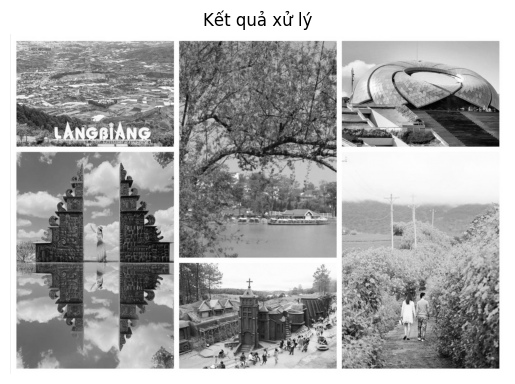

In [5]:
# 4. Tao menu như hình sau:
# geometric transformation
#  coordinate_mapping
#  -Rotate
#  -Scale
#  -Shift
# -segment
#  -Adaptive_thresholding
#  -Binary_dilation
#  -Binary_erosion
#  Otsu
# Viết chương trình cho phép người dùng nhập chức năng muốn xử lý. (Có thể chọn 1 chức năng
# duy nhất hoặc kết hợp 2 chức năng của geometric_transformation và segment)

import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import scipy.ndimage as nd
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu, threshold_local
from skimage.morphology import binary_dilation, binary_erosion

# ===== Hàm biến đổi hình học =====
def rotate_image(image, angle=45):
    return nd.rotate(image, angle, reshape=True)

def scale_image(image, scale_factor=1.5):
    return nd.zoom(image, zoom=scale_factor)

def shift_image(image, shift_x=50, shift_y=0):
    return nd.shift(image, shift=[shift_y, shift_x])

def coordinate_mapping(image):
    rows, cols = image.shape
    map_y, map_x = np.indices((rows, cols))
    map_x = map_x + 10 * np.sin(2 * np.pi * map_y / 50)
    return nd.map_coordinates(image, [map_y, map_x], order=1, mode='reflect')

# ===== Hàm phân đoạn ảnh =====
def adaptive_thresholding(image):
    block_size = 35
    local_thresh = threshold_local(image, block_size, offset=10)
    return image > local_thresh

def apply_otsu(image):
    thresh = threshold_otsu(image)
    return image > thresh

def apply_binary_dilation(image):
    return binary_dilation(image)

def apply_binary_erosion(image):
    return binary_erosion(image)

# ===== Đọc ảnh gốc =====
img = iio.imread('dalat.jpg')
gray = rgb2gray(img)

# ===== MENU =====
print("=== MENU ===")
print("geometric_transformation:")
print("  - rotate")
print("  - scale")
print("  - shift")
print("coordinate_mapping")
print("segment:")
print("  - adaptive_thresholding")
print("  - binary_dilation")
print("  - binary_erosion")
print("  - otsu")
print("========================")

# ===== Nhập lựa chọn người dùng =====
choice1 = input("Chọn chức năng geometric_transformation hoặc coordinate_mapping (nhập bỏ trống nếu không): ").strip().lower()
choice2 = input("Chọn chức năng segment (nhập bỏ trống nếu không): ").strip().lower()

# ===== Xử lý lựa chọn 1 =====
processed = gray.copy()
if choice1 == "rotate":
    processed = rotate_image(processed)
elif choice1 == "scale":
    processed = scale_image(processed)
elif choice1 == "shift":
    processed = shift_image(processed)
elif choice1 == "coordinate_mapping":
    processed = coordinate_mapping(processed)

# ===== Xử lý lựa chọn 2 =====
if choice2 == "adaptive_thresholding":
    processed = adaptive_thresholding(processed)
elif choice2 == "otsu":
    processed = apply_otsu(processed)
elif choice2 == "binary_dilation":
    processed = apply_binary_dilation(processed)
elif choice2 == "binary_erosion":
    processed = apply_binary_erosion(processed)

# ===== Kết quả và hiển thị =====
# Nếu kết quả là nhị phân, chuyển thành uint8
if processed.dtype == bool:
    result = (processed * 255).astype(np.uint8)
else:
    result = (processed * 255).astype(np.uint8)

# Lưu ảnh
iio.imwrite('output_menu_result.jpg', result)

# Hiển thị
plt.imshow(result, cmap='gray')
plt.title("Kết quả xử lý")
plt.axis('off')
plt.show()
